# MODELS

## ARIMA

Auto Regressive Integrated Moving Average

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
df = pd.read_csv('/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv')
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df = df.set_index(['Month'])
df.head(5)

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


### FUNCTIONALITIES TO ADD TO CLASS
        1. Train model/parameter tuning
        2. Forecasting
        3. Visualizations: Autocorrelation, Partial Autocorrelation, ETS Decomp


### Visualizations

In [4]:
df.index.name

'Month'

In [5]:
def plot_series(df: pd.DataFrame):
    plt.xlabel(df.index.name)
    plt.ylabel(df.columns[0])
    plt.plot(df)
    plt.title('Series plot')

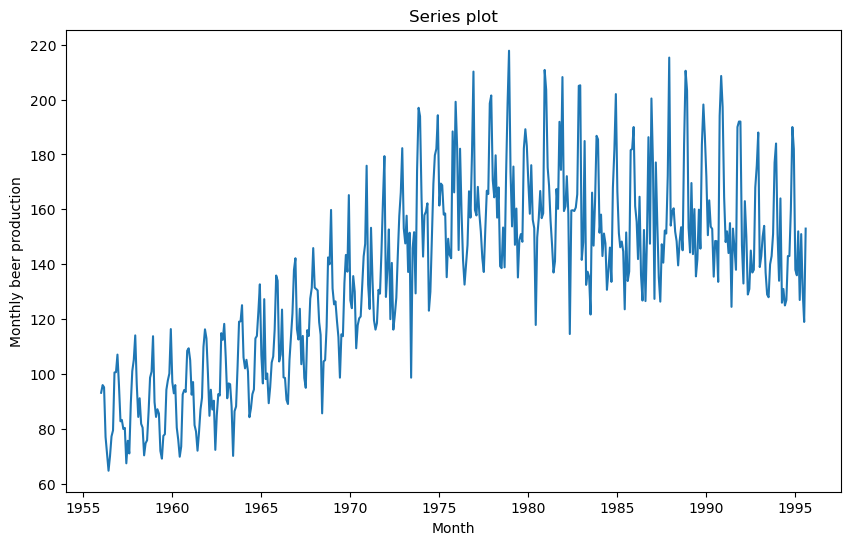

In [6]:
plot_series(df)

In [7]:
def plot_rolling_stats(df: pd.DataFrame, window: int):
    rolmean = df.rolling(window=12).mean()
    rolstd = df.rolling(window=12).std()
    orig = plt.plot(df, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

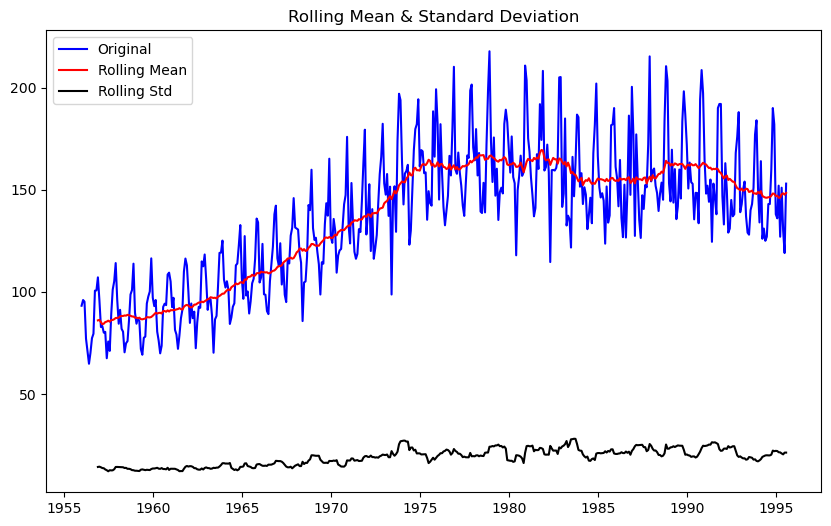

In [8]:
plot_rolling_stats(df, 12)

In [ ]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)